In [1]:
%matplotlib inline
from common import *

# Test Generator

In [ ]:
sd = data.nonrising.generate_data_item(0)

# Generate Data Parallel

In [107]:
data.nonrising.parallel_create_data(10, overwrite=True, max_workers=10)

SimulationData(create-data[optimization-nonrising-6d-256p], create_data_worker)

In [110]:
data.nonconcave.parallel_create_data(10, overwrite=True, max_workers=10)

SimulationData(create-data[optimization-nonconcave-6d-256p], create_data_worker)

In [114]:
data.concave.parallel_create_data(10, overwrite=True, max_workers=10)

SimulationData(create-data[optimization-concave-6d-256p], create_data_worker)

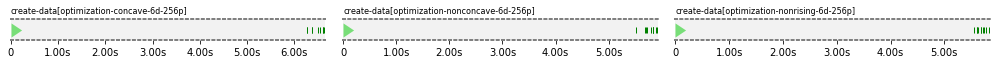

In [117]:
display(*sim.print_simulations_status_joined(show_finished_count=9, progress_columns=3))

In [ ]:
sim.get_simulation('CreateData[optimization-6d-256p]').results()

In [114]:
sim.destroy_executors()

In [129]:
data.nonconcave.verify_data_seeds()

In [25]:
sd = data.concave.load_data(0)
sd

SimulationData({ 'folder-format': '{ndim}d-{n}p',
  'generate-time': 0.18939805030822754,
  'index': 0,
  'n': 256,
  'name': 'optimization-concave-6d-256p',
  'ndim': 6,
  'prefix': 'optimization-concave',
  'seed': 1663928292,
  'valuation': { 'concave': True,
                 'local-maximum-limit': None,
                 'wealth-dist': ['lomax', 1.160964047443681, [0, 128]]}})

## Generate Resource Dependency

In [2]:
for ds in data.all_datasets:
    data_list = list(ds.get_data_index_list())
    for i in data_list:
        sd = ds.load_data(i, mode='w')
        data.gen.generate_resource_dependency(sd)

Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.
Generating resource dependency.


# Validate Wealth

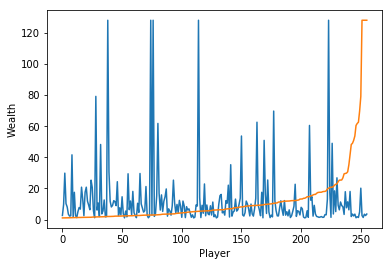

In [8]:
data.plot.plot_wealth(sd)

# Validate Valuations

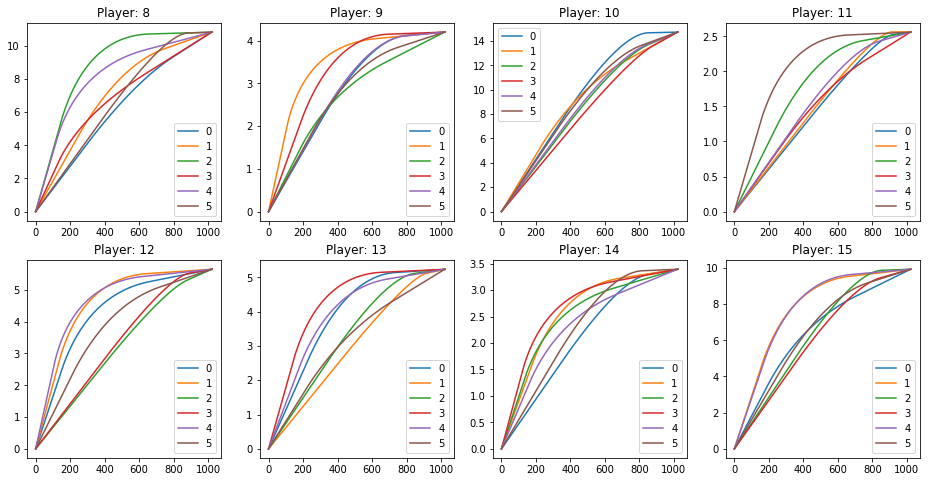

In [26]:
data.plot.plot_vals_slice(sd, range_start=8, range_count=8)

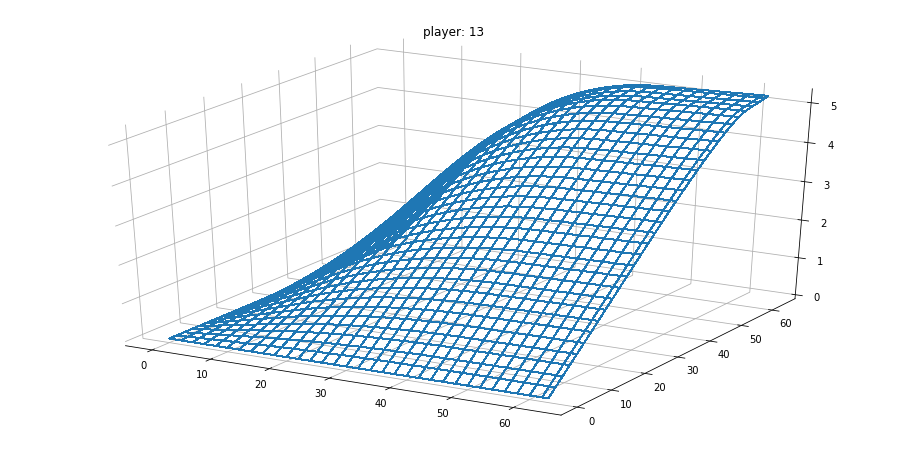

In [29]:
plt.figure(figsize=(16,8))
data.plot.plot_val(sd, 13, ndim=2, sz=(64,64))

In [73]:
t = []
x = set(range(6))
dep = list(np.random.choice(['c', 's'], p=[0.7, 0.3], size=len(x)-1))
print(x, dep)
while len(x) > 1:
    print(x)
    nodes = np.random.choice(list(x), size=2, replace=False)
    action = dep.pop()
    t.append((action, list(nodes)))
    x.remove(nodes[0])
t

{0, 1, 2, 3, 4, 5} ['s', 'c', 's', 'c', 'c']
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4}
{0, 1, 3, 4}
{0, 1, 4}
{0, 4}


([('c', [5, 2]), ('c', [2, 4]), ('s', [3, 0]), ('c', [1, 0]), ('s', [4, 0])],
 [])